# PREDICCIONES CON PYCARET
En esta sección vamos analizar los datos que tenemos para poder predecir las tendencias de la electricidad y las energías analizadas para nuestro analisis.


In [3]:
'''
Este codigo solo es necesario si corres gran parte de tu trabajo en Google Colab, como mi caso.
# Obtener datos de google drive
from google.colab import drive
drive.mount('/content/drive')
'''

Mounted at /content/drive


In [4]:
# Librerias a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [44]:
# Configuración de pandas para mostrar todas las filas y columnas
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [ ]:
'''
# Codigo para poder instalar pycaret
!pip install pycaret
'''

'\n# Codigo para poder instalar pycaret\n!pip install pycaret\n'

In [ ]:
'''
# Mostrar la versión de pycaret instalada
!pip show pycaret
'''


Name: pycaret
Version: 3.3.2
Summary: PyCaret - An open source, low-code machine learning library in Python.
Home-page: https://github.com/pycaret/pycaret
Author: Moez Ali
Author-email: moez.ali@queensu.ca
License: MIT
Location: /usr/local/lib/python3.10/dist-packages
Requires: category-encoders, cloudpickle, deprecation, imbalanced-learn, importlib-metadata, ipython, ipywidgets, jinja2, joblib, kaleido, lightgbm, markupsafe, matplotlib, nbformat, numba, numpy, pandas, plotly, plotly-resampler, pmdarima, psutil, pyod, requests, schemdraw, scikit-learn, scikit-plot, scipy, sktime, statsmodels, tbats, tqdm, wurlitzer, xxhash, yellowbrick
Required-by: 


# 1. PREDICCION DE PRODUCCION DE ELECTRICIDAD POR PAISES
Vamos enfocar nuestro análisis en predecir la producción dde electricidad en función del tipo de combustible y el país.



In [ ]:
# Configuración de pandas para mostrar todas las filas y columnas
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [ ]:
# Cargamos dataframe de estudio
df_produccion = pd.read_csv('data/datos_limpios/1_df_produccion_electricidad.csv')
df_produccion.head()

,Country,Time,Balance,Product,Value,Unit
0,Australia,March 2024,Producción Neta de Electricidad,Electricidad,23130.2764,GWh
1,Australia,March 2024,Producción Neta de Electricidad,Total de Combustibles,14353.8714,GWh
2,Australia,March 2024,Producción Neta de Electricidad,"Carbón, Turba y Gases Manufacturados",10304.7825,GWh
3,Australia,March 2024,Producción Neta de Electricidad,Petróleo y Productos Derivados,330.5351,GWh
4,Australia,March 2024,Producción Neta de Electricidad,Gas Natural,3492.4621,GWh


In [ ]:
# Vemos si todos los datos tienen el formato correcto
df_produccion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123999 entries, 0 to 123998
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Country  123999 non-null  object 
 1   Time     123999 non-null  object 
 2   Balance  123999 non-null  object 
 3   Product  123999 non-null  object 
 4   Value    123999 non-null  float64
 5   Unit     123999 non-null  object 
dtypes: float64(1), object(5)
memory usage: 5.7+ MB


In [ ]:
# Verificamos los valores nulos
df_produccion.isnull().sum()

,0
Country,0
Time,0
Balance,0
Product,0
Value,0
Unit,0


In [ ]:
# Cambiamos time a tipo de dato time
df_produccion['Time'] = pd.to_datetime(df_produccion['Time'],format='%B %Y')

In [ ]:
# Comprobamos que el cambio se ha realizado correctamente
df_produccion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123999 entries, 0 to 123998
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   Country  123999 non-null  object        
 1   Time     123999 non-null  datetime64[ns]
 2   Balance  123999 non-null  object        
 3   Product  123999 non-null  object        
 4   Value    123999 non-null  float64       
 5   Unit     123999 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 5.7+ MB


In [ ]:
# Extraer características adicionales de 'Time'
df_produccion['Year'] = df_produccion['Time'].dt.year
df_produccion['Month'] = df_produccion['Time'].dt.month
df_produccion['Day'] = df_produccion['Time'].dt.day

'''
Esto lo hemos hecho para poder tratar los datos con pycaret.
Si mantemos el formato de time original, no es posible analizar los datos para
predecir la producción de electricidad.
'''


In [ ]:
df_produccion.columns

Index(['Country', 'Time', 'Balance', 'Product', 'Value', 'Unit', 'Year',
       'Month', 'Day'],
      dtype='object')

Vamos a utilizar el módulo de regresión de Pycaret para predecir el valor de producción de electricidad.

In [ ]:
print(df_produccion.columns)


Index(['Country', 'Time', 'Balance', 'Product', 'Value', 'Unit'], dtype='object')


In [ ]:
df_produccion.head()

,Country,Time,Balance,Product,Value,Unit,Year,Month,Day
0,Australia,2024-03-01,Producción Neta de Electricidad,Electricidad,23130.2764,GWh,2024,3,1
1,Australia,2024-03-01,Producción Neta de Electricidad,Total de Combustibles,14353.8714,GWh,2024,3,1
2,Australia,2024-03-01,Producción Neta de Electricidad,"Carbón, Turba y Gases Manufacturados",10304.7825,GWh,2024,3,1
3,Australia,2024-03-01,Producción Neta de Electricidad,Petróleo y Productos Derivados,330.5351,GWh,2024,3,1
4,Australia,2024-03-01,Producción Neta de Electricidad,Gas Natural,3492.4621,GWh,2024,3,1


In [ ]:
from pycaret.regression import setup, compare_models, finalize_model, predict_model, save_model

In [ ]:
# Configuramos el entorno de Pycaret
exp_reg = setup(data=df_produccion,
                target='Value',
                categorical_features=['Country', 'Balance', 'Product', 'Unit'],
                numeric_features=['Year', 'Month', 'Day'],
                session_id=123)


,Description,Value
0,Session id,123
1,Target,Value
2,Target type,Regression
3,Original data shape,"(123999, 9)"
4,Transformed data shape,"(123999, 30)"
5,Transformed train set shape,"(86799, 30)"
6,Transformed test set shape,"(37200, 30)"
7,Numeric features,3
8,Date features,1
9,Categorical features,4


In [ ]:
# Creamos y comparamos modelos
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
xgboost,Extreme Gradient Boosting,728.4007,5469443.1000,2326.2084,0.9955,1.9521,284.4052,1.6000
rf,Random Forest Regressor,409.6028,6842521.4397,2587.0535,0.9944,0.2959,1.1264,35.4990
et,Extra Trees Regressor,426.6649,8197590.0040,2829.5279,0.9933,0.4585,1.2913,36.1860
dt,Decision Tree Regressor,511.4579,11167966.9666,3266.1770,0.9909,0.3313,0.6911,1.2670
gbr,Gradient Boosting Regressor,3874.8186,109229590.3480,10441.6389,0.9094,3.1670,1181.1676,8.1920
ada,AdaBoost Regressor,9962.0053,480393567.9834,21904.9364,0.6004,4.3400,11550.9832,7.6870
knn,K Neighbors Regressor,7375.6979,769865337.6000,27711.2314,0.3647,3.0230,2669.7038,5.2720
lasso,Lasso Regression,10143.3618,801573040.9981,28259.0824,0.3429,4.1066,13459.8636,5.2150
ridge,Ridge Regression,10149.7830,801573585.2850,28259.1022,0.3429,4.1075,13502.6883,0.5280
lr,Linear Regression,10151.1589,801573670.5533,28259.1084,0.3429,4.1077,13508.3425,1.6780


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [ ]:
# Entrenamos el mejor modelo
final_model = finalize_model(best_model)


In [ ]:
predictions = predict_model(final_model)

In [ ]:
# Hacemos las predicciones
predictions = predict_model(final_model, data=df_produccion)
predictions

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extreme Gradient Boosting,647.6728,2507218.5000,1583.4199,0.9979,1.9386,170.5494


,Country,Time,Balance,Product,Unit,Year,Month,Day,Value,prediction_label
0,Australia,2024-03-01,Producción Neta de Electricidad,Electricidad,GWh,2024,3,1,23130.277344,21538.070312
1,Australia,2024-03-01,Producción Neta de Electricidad,Total de Combustibles,GWh,2024,3,1,14353.871094,13545.962891
2,Australia,2024-03-01,Producción Neta de Electricidad,"Carbón, Turba y Gases Manufacturados",GWh,2024,3,1,10304.782227,9731.619141
3,Australia,2024-03-01,Producción Neta de Electricidad,Petróleo y Productos Derivados,GWh,2024,3,1,330.535095,197.133575
4,Australia,2024-03-01,Producción Neta de Electricidad,Gas Natural,GWh,2024,3,1,3492.462158,4147.453613
...,...,...,...,...,...,...,...,...,...,...
123994,United States,2010-01-01,Importaciones Totales,Electricidad,GWh,2010,1,1,5808.577148,6272.729980
123995,United States,2010-01-01,Exportaciones Totales,Electricidad,GWh,2010,1,1,996.567017,2461.010986
123996,United States,2010-01-01,Usado para almacenamiento por bombeo,Electricidad,GWh,2010,1,1,2283.322021,3096.010742
123997,United States,2010-01-01,Pérdidas de Distribución,Electricidad,GWh,2010,1,1,22933.296875,22440.236328


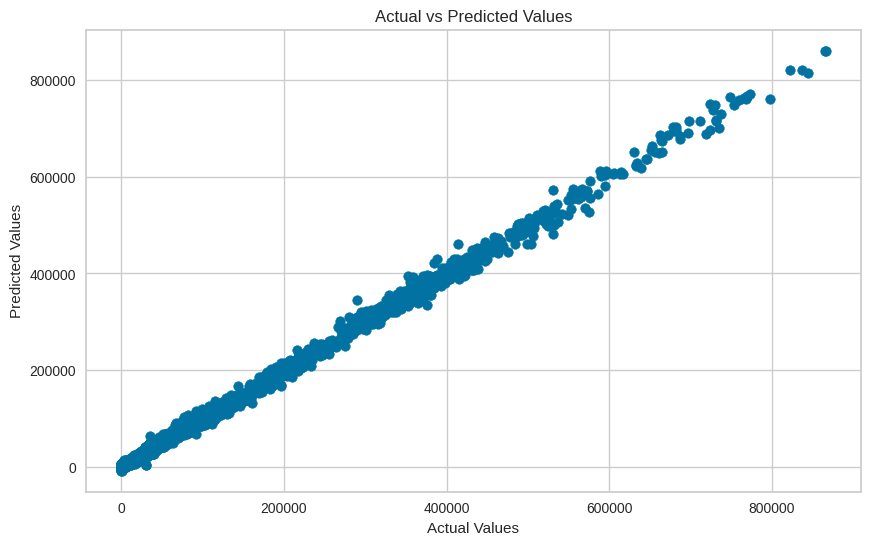

In [ ]:
# Evaluamos el rendimiento del modelo
plt.figure(figsize=(10, 6))
plt.scatter(predictions['Value'], predictions['prediction_label'])
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

### Al mirar la grafica, podemos ver como nuestro modelo está funcionando bastante bien. Las predicciones están alineadas con los valores reales, lo que sugiera que el modelo tiene un buen rendimiento para el conjunto de datos proporcionados.

In [ ]:
# Guardamos el modelo
save_model(final_model, 'modelo_predicción_electricidad')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('date_feature_extractor',
                  TransformerWrapper(include=['Time'],
                                     transformer=ExtractDateTimeFeatures())),
                 ('numerical_imputer',
                  TransformerWrapper(include=['Year', 'Month', 'Day'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['Country', 'Balance', 'Product',
                                              'Unit'],
                                     transformer=S...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                

In [ ]:
'''
# Descargamos el modelos para utilizar posteriormente
from google.colab import files
files.download('modelo_predicción_electricidad.pkl')
'''

"\n# Descargamos el modelos para utilizar posteriormente\nfrom google.colab import files\nfiles.download('modelo_predicción_electricidad.pkl')\n"

# 2. PREDICCION DE PRECIOS GASOLINA/GASOIL/QUEROSENO
Vamos enfocar nuestro análisis en predecir el precio total o valor de los productos de nuestro dataframe a lo largo del tiempo y/o para diferentes países.


In [ ]:
# Cargamos el dataframe de estudio
df_combustibles = pd.read_csv ('data/datos_limpios/2_df_petroleo.csv')
df_combustibles.head()

,COUNTRY,PRODUCT,FLOW,UNIT,TIME,VALUE,YEAR,MONTH
0,Austria,Gasolina (unidad/litro),Precio Total,Dolar Estadounidense,2015-01-01,1.31,2015,1
1,Austria,Gasolina (unidad/litro),Precio Total,Dolar Estadounidense,2015-02-01,1.31,2015,2
2,Austria,Gasolina (unidad/litro),Precio Total,Dolar Estadounidense,2015-03-01,1.31,2015,3
3,Austria,Gasolina (unidad/litro),Precio Total,Dolar Estadounidense,2015-04-01,1.35,2015,4
4,Austria,Gasolina (unidad/litro),Precio Total,Dolar Estadounidense,2015-05-01,1.41,2015,5


In [ ]:
# Verificamos el tipo de datos y también si tenemos valores nulos
print(df_combustibles.info())
nulos = df_combustibles.isnull().sum()
print(nulos)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11187 entries, 0 to 11186
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   COUNTRY  11187 non-null  object 
 1   PRODUCT  11187 non-null  object 
 2   FLOW     11187 non-null  object 
 3   UNIT     11187 non-null  object 
 4   TIME     11187 non-null  object 
 5   VALUE    10873 non-null  float64
 6   YEAR     11187 non-null  int64  
 7   MONTH    11187 non-null  int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 699.3+ KB
None
COUNTRY      0
PRODUCT      0
FLOW         0
UNIT         0
TIME         0
VALUE      314
YEAR         0
MONTH        0
dtype: int64


Al ver la información anterior, podemos ver que tenemos 2 problemas:
1. Columna TIME no es del tipo time
2. Tenemos valores nulos en columna VALUE

Las soluciones que planteamos son cambiar el tipo de dato dentro de la columna TIME y eliminar las filas con valores nulos dentro de VALUE.


In [ ]:
# Cambiamos columna TIME a tipo de dato time
df_combustibles['TIME'] = pd.to_datetime(df_combustibles['TIME'])

# Eliminamos los valores nulos de VALUE
df_combustibles = df_combustibles.dropna(subset=['VALUE'])

# Verificamos que los cambios se han realizado correctamente
print(df_combustibles.info())
nulos = df_combustibles.isnull().sum()
print('\n')
print(nulos)

<class 'pandas.core.frame.DataFrame'>
Index: 10873 entries, 0 to 11185
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   COUNTRY  10873 non-null  object        
 1   PRODUCT  10873 non-null  object        
 2   FLOW     10873 non-null  object        
 3   UNIT     10873 non-null  object        
 4   TIME     10873 non-null  datetime64[ns]
 5   VALUE    10873 non-null  float64       
 6   YEAR     10873 non-null  int64         
 7   MONTH    10873 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 764.5+ KB
None


COUNTRY    0
PRODUCT    0
FLOW       0
UNIT       0
TIME       0
VALUE      0
YEAR       0
MONTH      0
dtype: int64


In [ ]:
'''
!pip install virtualenv
!virtualenv venv
!source venv/bin/activate
!pip install pycaret
'''


'\n!pip install virtualenv\n!virtualenv venv\n!source venv/bin/activate\n!pip install pycaret\n'

In [ ]:
# Importamos funciones de Pycaret para desarrollar nuestro modelo de regresión
from pycaret.regression import setup, compare_models, finalize_model, predict_model, save_model

In [ ]:
df_combustibles.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10873 entries, 0 to 11185
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   COUNTRY  10873 non-null  object        
 1   PRODUCT  10873 non-null  object        
 2   FLOW     10873 non-null  object        
 3   UNIT     10873 non-null  object        
 4   TIME     10873 non-null  datetime64[ns]
 5   VALUE    10873 non-null  float64       
 6   YEAR     10873 non-null  int64         
 7   MONTH    10873 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 764.5+ KB


In [ ]:
# Configuramos el entorno de Pycaret
exp_reg = setup(
    data=df_combustibles,
    target='VALUE',
    categorical_features=['COUNTRY', 'PRODUCT', 'FLOW', 'UNIT'],
    date_features=['TIME'],
    session_id=123
)


,Description,Value
0,Session id,123
1,Target,VALUE
2,Target type,Regression
3,Original data shape,"(10873, 8)"
4,Transformed data shape,"(10873, 12)"
5,Transformed train set shape,"(7611, 12)"
6,Transformed test set shape,"(3262, 12)"
7,Numeric features,2
8,Date features,1
9,Categorical features,4


In [ ]:
# Creamos y comparamos modelos
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
xgboost,Extreme Gradient Boosting,0.0316,0.0021,0.0453,0.9864,0.0196,0.0261,0.4040
rf,Random Forest Regressor,0.0403,0.0036,0.0596,0.9764,0.0254,0.0327,1.9770
lightgbm,Light Gradient Boosting Machine,0.0500,0.0049,0.0696,0.9679,0.0298,0.0411,0.4260
et,Extra Trees Regressor,0.0464,0.0051,0.0709,0.9665,0.0306,0.0376,1.7780
dt,Decision Tree Regressor,0.0484,0.0059,0.0770,0.9607,0.0328,0.0387,0.5750
gbr,Gradient Boosting Regressor,0.0989,0.0171,0.1304,0.8872,0.0581,0.0857,0.7580
ada,AdaBoost Regressor,0.1468,0.0331,0.1818,0.7812,0.0825,0.1324,0.4280
knn,K Neighbors Regressor,0.1381,0.0341,0.1846,0.7741,0.0853,0.1276,0.2790
br,Bayesian Ridge,0.1557,0.0406,0.2012,0.7315,0.0907,0.1372,0.1590
ridge,Ridge Regression,0.1557,0.0406,0.2012,0.7315,0.0907,0.1372,0.1580


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [ ]:
# Entrenamos el mejor modelo
final_model = finalize_model(best_model)

In [ ]:
# Hacemos predicciones
predictions = predict_model(final_model, data=df_combustibles)
predictions

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extreme Gradient Boosting,0.0223,0.0010,0.0318,0.9933,0.0137,0.0183


,COUNTRY,PRODUCT,FLOW,UNIT,TIME,YEAR,MONTH,VALUE,prediction_label
0,Austria,Gasolina (unidad/litro),Precio Total,Dolar Estadounidense,2015-01-01,2015,1,1.31,1.299053
1,Austria,Gasolina (unidad/litro),Precio Total,Dolar Estadounidense,2015-02-01,2015,2,1.31,1.295202
2,Austria,Gasolina (unidad/litro),Precio Total,Dolar Estadounidense,2015-03-01,2015,3,1.31,1.303303
3,Austria,Gasolina (unidad/litro),Precio Total,Dolar Estadounidense,2015-04-01,2015,4,1.35,1.313636
4,Austria,Gasolina (unidad/litro),Precio Total,Dolar Estadounidense,2015-05-01,2015,5,1.41,1.424587
...,...,...,...,...,...,...,...,...,...
11181,India,Gasóleo para calefacción doméstica (unidad/litro),Precio Total,Dolar Estadounidense,2023-12-01,2023,12,0.93,0.878972
11182,India,Gasóleo para calefacción doméstica (unidad/litro),Precio Total,Dolar Estadounidense,2024-01-01,2024,1,0.80,0.791629
11183,India,Gasóleo para calefacción doméstica (unidad/litro),Precio Total,Dolar Estadounidense,2024-02-01,2024,2,0.79,0.792937
11184,India,Gasóleo para calefacción doméstica (unidad/litro),Precio Total,Dolar Estadounidense,2024-03-01,2024,3,0.79,0.795762


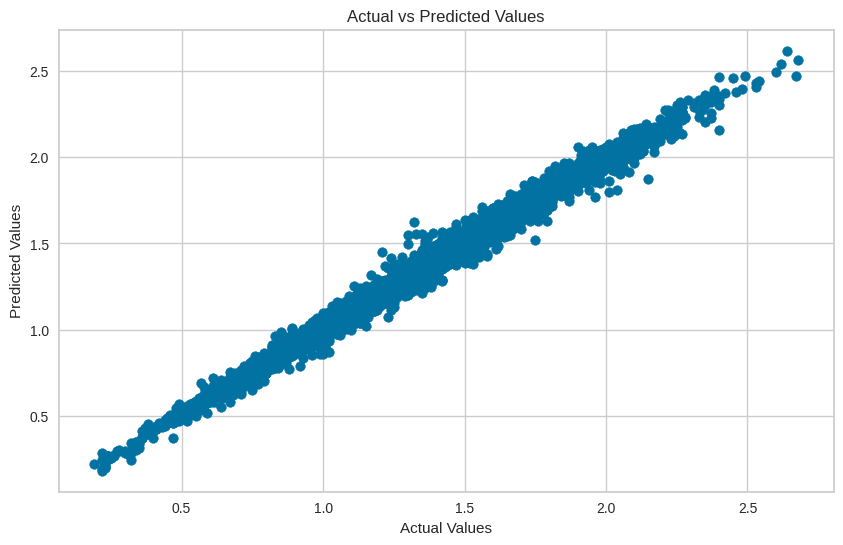

In [ ]:
# Evaluamos el modelo
plt.figure(figsize=(10, 6))
plt.scatter(predictions['VALUE'], predictions['prediction_label'])
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

In [ ]:
# Guardamos el modelos
save_model (final_model, 'modelo_prediccion_valor_combustible')


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('date_feature_extractor',
                  TransformerWrapper(include=['TIME'],
                                     transformer=ExtractDateTimeFeatures())),
                 ('numerical_imputer',
                  TransformerWrapper(include=['YEAR', 'MONTH'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['COUNTRY', 'PRODUCT', 'FLOW',
                                              'UNIT'],
                                     transformer=SimpleImpu...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                 

In [ ]:
'''
# Descargamos el modelos para presentación streamlit
from google.colab import files
files.download('modelo_prediccion_valor_combustible.pkl')
'''

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 3. MODELOS PREDICTIVO DE LA TENDENCIA DE PRECIOS ELECTRICIDAD EN ESPAÑA
Vamos enfocar nuestro análisis en predecir la tendencia de precios de electricidad en España

In [30]:
# Cargamos nuestro dataframe
df_electricidad_españa = pd.read_csv ('data/datos_limpios/3_df_electricidad_España.csv')
df_electricidad_españa.head()

,name,geoname,Value(€/MWh),date,hours (utc),year,month
0,Precio diario,España,66.88,2018-12-31,23:00,2018,12
1,Precio diario,España,66.88,2019-01-01,00:00,2019,1
2,Precio diario,España,66.00,2019-01-01,01:00,2019,1
3,Precio diario,España,63.64,2019-01-01,02:00,2019,1
4,Precio diario,España,58.85,2019-01-01,03:00,2019,1


In [31]:
# Analizamos el estado del dataframe antes de estudio de tendencia
print(df_electricidad_españa.info())
nulos = df_electricidad_españa.isnull().sum()
print('\n')
print(nulos)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96422 entries, 0 to 96421
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          96422 non-null  object 
 1   geoname       96422 non-null  object 
 2   Value(€/MWh)  96422 non-null  float64
 3   date          96422 non-null  object 
 4   hours (utc)   96422 non-null  object 
 5   year          96422 non-null  int64  
 6   month         96422 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 5.1+ MB
None


name            0
geoname         0
Value(€/MWh)    0
date            0
hours (utc)     0
year            0
month           0
dtype: int64


Para nuestro estudio de prediccion vamos a omitir las horas porque si no, nuestro predictor sería por horas, y queremos hacer para lo que resta de año. Para ello, vamos agrupar los días en uno solo y luego vamos proceder con el análisis de series temporales para poder hacer nuestra predicción del precio de la electricidad lo que resta de año.

In [32]:
# Creamos el dataframe de estudio
df_electricidad_españa = df_electricidad_españa.groupby('date').agg({'Value(€/MWh)': 'mean'}).reset_index()
df_electricidad_españa.head()

,date,Value(€/MWh)
0,2018-12-30,63.930000
1,2018-12-31,62.116400
2,2019-01-01,63.240417
3,2019-01-02,60.552083
4,2019-01-03,64.225833


In [33]:
df_electricidad_españa.info() # mostramos información

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2011 entries, 0 to 2010
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          2011 non-null   object 
 1   Value(€/MWh)  2011 non-null   float64
dtypes: float64(1), object(1)
memory usage: 31.5+ KB


In [34]:
# Convertimos date a tipo de dato time
df_electricidad_españa['date'] = pd.to_datetime(df_electricidad_españa['date'])
df_electricidad_españa.info() # mostramos la información

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2011 entries, 0 to 2010
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          2011 non-null   datetime64[ns]
 1   Value(€/MWh)  2011 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 31.5 KB


In [35]:
print(df_electricidad_españa.columns) # Mostramos las columnas

Index(['date', 'Value(€/MWh)'], dtype='object')


In [36]:
df_electricidad_españa.set_index('date', inplace=True) # pasamos date como indice


In [37]:
# Establecemos la frecuencia del índice
df_electricidad_españa.index = df_electricidad_españa.index.to_period('D')

# Verificamos la frecuencia del índice
print(df_electricidad_españa.index.freq)  # Debería mostrar 'D'


<Day>


In [38]:
# Verificamos los duplicados en el índice
duplicates = df_electricidad_españa.index[df_electricidad_españa.index.duplicated()].unique()
print(f"Índices duplicados encontrados: {duplicates}")

# Eliminamos los duplicados, conservando la primera ocurrencia
df_electricidad_españa = df_electricidad_españa[~df_electricidad_españa.index.duplicated(keep='first')]

Índices duplicados encontrados: PeriodIndex([], dtype='period[D]', name='date')


In [39]:
'''
El código de a continuación, asegura que nuestro dataframe tengo un registro para cada día
en el rango de fechas, y luego rellena cualquier valor fantante en la columna 'Value(€/MWh)'
mediante interpolación lineal.

Esto lo hemos hecho porque detro de nuestro dataframe había días que no había datos. Si nuestro
dataframe hubiera estado completo no hubiera necesidad de hacer esto. Es fundamental tener el dataframe
correcto para luego hacer el modelo predictivo mediante regresión.
'''

# Creamos un rango de índices periódicos que cubran todo el rango de tiempo
idx = pd.period_range(start=df_electricidad_españa.index.min(), end=df_electricidad_españa.index.max(), freq='D')

# Reindexar el DataFrame para incluir todos los periodos
df_electricidad_españa = df_electricidad_españa.reindex(idx, fill_value=np.nan)

# Imputar valores nulos usando interpolación
df_electricidad_españa['Value(€/MWh)'] = df_electricidad_españa['Value(€/MWh)'].interpolate(method='linear')



In [40]:
from pycaret.time_series import TSForecastingExperiment

# Creamos un experimento de series temporales
exp = TSForecastingExperiment()

# Configurar el experimento
exp.setup(data=df_electricidad_españa, target='Value(€/MWh)', session_id=123)


,Description,Value
0,session_id,123
1,Target,Value(€/MWh)
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(2011, 1)"
5,Transformed data shape,"(2011, 1)"
6,Transformed train set shape,"(2010, 1)"
7,Transformed test set shape,"(1, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [41]:
# Creamos y comparamos los modelos
best_model = exp.compare_models()


,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,TT (Sec)
exp_smooth,Exponential Smoothing,0.2394,0.1530,6.4995,6.4995,0.1145,0.1037,4.0300
rf_cds_dt,Random Forest w/ Cond. Deseasonalize & Detrending,0.2674,0.1709,7.2558,7.2558,0.1319,0.1578,6.8167
lightgbm_cds_dt,Light Gradient Boosting w/ Cond. Deseasonalize & Detrending,0.2742,0.1752,7.4414,7.4414,0.1371,0.1558,2.4733
ada_cds_dt,AdaBoost w/ Cond. Deseasonalize & Detrending,0.2828,0.1807,7.6763,7.6763,0.1197,0.1272,0.7267
omp_cds_dt,Orthogonal Matching Pursuit w/ Cond. Deseasonalize & Detrending,0.2845,0.1819,7.7234,7.7234,0.1449,0.1408,0.2433
et_cds_dt,Extra Trees w/ Cond. Deseasonalize & Detrending,0.2904,0.1856,7.8815,7.8815,0.1331,0.1452,2.0800
gbr_cds_dt,Gradient Boosting w/ Cond. Deseasonalize & Detrending,0.2994,0.1914,8.1268,8.1268,0.1351,0.1364,3.4433
ets,ETS,0.3053,0.1951,8.2881,8.2881,0.1534,0.1314,1.8100
theta,Theta Forecaster,0.3296,0.2107,8.9485,8.9485,0.1557,0.1393,0.0767
br_cds_dt,Bayesian Ridge w/ Cond. Deseasonalize & Detrending,0.3321,0.2122,9.0133,9.0133,0.1634,0.1601,0.3333


Processing:   0%|          | 0/117 [00:00<?, ?it/s]

In [42]:
# Entrenar el mejor modelo
final_model = exp.finalize_model(best_model)

In [45]:
# Hacemos predicciones
future_predictions = exp.predict_model(final_model, fh=150) # fh es el número de periodos (nuestro caso días)
future_predictions

,y_pred
2024-07-02,57.8078
2024-07-03,54.6034
2024-07-04,52.0846
2024-07-05,50.5313
2024-07-06,45.1601
2024-07-07,43.7583
2024-07-08,69.0113
2024-07-09,58.1182
2024-07-10,49.9626
2024-07-11,53.2896


In [46]:
# Evaluamos el modelo
exp.plot_model(final_model, plot='forecast')

In [47]:
# Guardar el modelo
exp.save_model(final_model, 'modelo_predictor_electricidad_dias')

Transformation Pipeline and Model Successfully Saved


(ForecastingPipeline(steps=[('forecaster',
                             TransformedTargetForecaster(steps=[('model',
                                                                 ForecastingPipeline(steps=[('forecaster',
                                                                                             TransformedTargetForecaster(steps=[('model',
                                                                                                                                 ExponentialSmoothing(seasonal='mul',
                                                                                                                                                      sp=35,
                                                                                                                                                      trend='add'))]))]))]))]),
 'modelo_predictor_electricidad_dias.pkl')

In [48]:
'''
#Descargamos el modelos para presentación streamlit
from google.colab import files
files.download('modelo_predictor_electricidad_dias.pkl')
'''

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## 3.2. PREDICCION POR HORAS
Ahora vamos hacer lo mismo que hemos hecho en el paso 3, pero en vez de tener en cuenta los días para poder hacer la predicción vamos hacer una predicción con las horas.

In [63]:
# Cargamos nuestro dataframe
df_electricidad_españa = pd.read_csv ('/content/drive/MyDrive/2. DATA ANALYTICS/PROYECTOS/PROYECTO 3 - Electricidad/data/datos_limpios/3_df_electricidad_España.csv')
df_electricidad_españa.head()

,name,geoname,Value(€/MWh),date,hours (utc),year,month
0,Precio diario,España,66.88,2018-12-31,23:00,2018,12
1,Precio diario,España,66.88,2019-01-01,00:00,2019,1
2,Precio diario,España,66.00,2019-01-01,01:00,2019,1
3,Precio diario,España,63.64,2019-01-01,02:00,2019,1
4,Precio diario,España,58.85,2019-01-01,03:00,2019,1


In [64]:
# Analizamos el estado del dataframe antes de estudio de tendencia
print(df_electricidad_españa.info())
nulos = df_electricidad_españa.isnull().sum()
print('\n')
print(nulos)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96422 entries, 0 to 96421
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          96422 non-null  object 
 1   geoname       96422 non-null  object 
 2   Value(€/MWh)  96422 non-null  float64
 3   date          96422 non-null  object 
 4   hours (utc)   96422 non-null  object 
 5   year          96422 non-null  int64  
 6   month         96422 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 5.1+ MB
None


name            0
geoname         0
Value(€/MWh)    0
date            0
hours (utc)     0
year            0
month           0
dtype: int64


In [65]:
# # Supongamos que tu DataFrame se llama df
df_electricidad_españa['datetime'] = pd.to_datetime(df_electricidad_españa['date'] + ' ' + df_electricidad_españa['hours (utc)'])


In [66]:
# Seleccionamos solo las columnas de estudio
df_electricidad_españa = df_electricidad_españa[['datetime', 'Value(€/MWh)']]
# Cambiamos el nombre de columna datatime a date
df_electricidad_españa.rename(columns={'datetime': 'date'}, inplace=True)
df_electricidad_españa.head()

,date,Value(€/MWh)
0,2018-12-31 23:00:00,66.88
1,2019-01-01 00:00:00,66.88
2,2019-01-01 01:00:00,66.00
3,2019-01-01 02:00:00,63.64
4,2019-01-01 03:00:00,58.85


In [67]:
# Pasamos date como indice
df_electricidad_españa.set_index('date', inplace=True)

# Establecemos la frecuencia del índice
df_electricidad_españa.index = df_electricidad_españa.index.to_period('H')

# Verificamos la frecuencia del índice
print(df_electricidad_españa.index.freq)  # Debería mostrar 'H'

<Hour>


In [68]:
# Verificamos los duplicados en el índice
duplicates = df_electricidad_españa.index[df_electricidad_españa.index.duplicated()].unique()
print(f"Índices duplicados encontrados: {duplicates}")

# Eliminamos los duplicados, conservando la primera ocurrencia
df_electricidad_españa = df_electricidad_españa[~df_electricidad_españa.index.duplicated(keep='first')]

Índices duplicados encontrados: PeriodIndex(['2018-12-31 23:00', '2019-01-01 00:00', '2019-01-01 01:00',
             '2019-01-01 02:00', '2019-01-01 03:00', '2019-01-01 04:00',
             '2019-01-01 05:00', '2019-01-01 06:00', '2019-01-01 07:00',
             '2019-01-01 08:00',
             ...
             '2024-06-30 12:00', '2024-06-30 13:00', '2024-06-30 14:00',
             '2024-06-30 15:00', '2024-06-30 16:00', '2024-06-30 17:00',
             '2024-06-30 18:00', '2024-06-30 19:00', '2024-06-30 20:00',
             '2024-06-30 21:00'],
            dtype='period[H]', name='date', length=48187)


In [69]:
'''
El código de a continuación, asegura que nuestro dataframe tengo un registro para cada día/hora
en el rango de fechas, y luego rellena cualquier valor fantante en la columna 'Value(€/MWh)'
mediante interpolación lineal.

Esto lo hemos hecho porque detro de nuestro dataframe había días que no había datos. Si nuestro
dataframe hubiera estado completo no hubiera necesidad de hacer esto. Es fundamental tener el dataframe
correcto para luego hacer el modelo predictivo mediante regresión.
'''

# Creamos un rango de índices periódicos que cubran todo el rango de tiempo
idx = pd.period_range(start=df_electricidad_españa.index.min(), end=df_electricidad_españa.index.max(), freq='H')

# Reindexar el DataFrame para incluir todos los periodos
df_electricidad_españa = df_electricidad_españa.reindex(idx, fill_value=np.nan)

# Imputar valores nulos usando interpolación
df_electricidad_españa['Value(€/MWh)'] = df_electricidad_españa['Value(€/MWh)'].interpolate(method='linear')

In [70]:
from pycaret.time_series import TSForecastingExperiment

# Creamos un experimento de series temporales
exp = TSForecastingExperiment()

# Configurar el experimento
exp.setup(data=df_electricidad_españa, target='Value(€/MWh)', session_id=123)


,Description,Value
0,session_id,123
1,Target,Value(€/MWh)
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(48239, 1)"
5,Transformed data shape,"(48239, 1)"
6,Transformed train set shape,"(48238, 1)"
7,Transformed test set shape,"(1, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [71]:
# Creamos y comparamos los modelos
best_model = exp.compare_models()


,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,TT (Sec)
stlf,STLF,0.4221,0.2449,6.3112,6.3112,0.0773,0.0731,1.7300
huber_cds_dt,Huber w/ Cond. Deseasonalize & Detrending,0.5100,0.2959,7.6254,7.6254,0.0806,0.0882,1.7900
ridge_cds_dt,Ridge w/ Cond. Deseasonalize & Detrending,0.5227,0.3033,7.8166,7.8166,0.0828,0.0906,0.9200
lr_cds_dt,Linear w/ Cond. Deseasonalize & Detrending,0.5227,0.3033,7.8166,7.8166,0.0828,0.0906,1.1867
br_cds_dt,Bayesian Ridge w/ Cond. Deseasonalize & Detrending,0.5229,0.3034,7.8194,7.8194,0.0829,0.0906,0.8533
en_cds_dt,Elastic Net w/ Cond. Deseasonalize & Detrending,0.5335,0.3096,7.9770,7.9770,0.0850,0.0928,1.6633
lasso_cds_dt,Lasso w/ Cond. Deseasonalize & Detrending,0.5359,0.3110,8.0135,8.0135,0.0853,0.0934,1.8700
llar_cds_dt,Lasso Least Angular Regressor w/ Cond. Deseasonalize & Detrending,0.5359,0.3110,8.0133,8.0133,0.0853,0.0934,0.7267
et_cds_dt,Extra Trees w/ Cond. Deseasonalize & Detrending,0.6064,0.3519,9.0682,9.0682,0.1008,0.1099,39.0200
xgboost_cds_dt,Extreme Gradient Boosting w/ Cond. Deseasonalize & Detrending,0.6443,0.3739,9.6344,9.6344,0.1085,0.1175,3.1433


Processing:   0%|          | 0/117 [00:00<?, ?it/s]

In [72]:
# Entrenar el mejor modelo
final_model = exp.finalize_model(best_model)

In [73]:
# Hacemos predicciones
future_predictions = exp.predict_model(final_model, fh=3600) # fh ponemos los mismos 5 mesese que pusimos en el análisis de días
future_predictions

,y_pred
2024-07-01 22:00,78.6097
2024-07-01 23:00,72.6775
2024-07-02 00:00,65.6433
2024-07-02 01:00,67.0769
2024-07-02 02:00,62.6465
...,...
2024-11-28 17:00,49.6044
2024-11-28 18:00,67.8029
2024-11-28 19:00,91.3134
2024-11-28 20:00,98.6283


In [74]:
# Evaluamos el modelo
exp.plot_model(final_model, plot='forecast')

Output hidden; open in https://colab.research.google.com to view.

In [75]:
# Guardar el modelo
exp.save_model(final_model, 'modelo_predictor_electricidad_horas')

Transformation Pipeline and Model Successfully Saved


(ForecastingPipeline(steps=[('forecaster',
                             TransformedTargetForecaster(steps=[('model',
                                                                 ForecastingPipeline(steps=[('forecaster',
                                                                                             TransformedTargetForecaster(steps=[('model',
                                                                                                                                 STLForecaster(sp=24))]))]))]))]),
 'modelo_predictor_electricidad_horas.pkl')

In [76]:
# Guardar el modelo
exp.save_model(final_model, 'modelo_predictor_electricidad_horas')

Transformation Pipeline and Model Successfully Saved


(ForecastingPipeline(steps=[('forecaster',
                             TransformedTargetForecaster(steps=[('model',
                                                                 ForecastingPipeline(steps=[('forecaster',
                                                                                             TransformedTargetForecaster(steps=[('model',
                                                                                                                                 STLForecaster(sp=24))]))]))]))]),
 'modelo_predictor_electricidad_horas.pkl')

In [77]:
'''
#Descargamos el modelos para presentación streamlit
from google.colab import files
files.download('modelo_predictor_electricidad_horas.pkl')
'''

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>